# Orbital Mechanics

* Orbital mechanics is a branch of celestial mechanics that focuses on the motion of objects in space under the influence of gravitational forces. It plays an important role in understanding and predicting the motion of celestial bodies such as planets, moons, satellites, and spacecraft.
* The two primary laws governing orbital motion are Kepler's laws of planetary motion and Newton's law of universal gravitation.
* The motion of a planet and a star or two stars around the common center of mass (in astronomy also called barycenter) is governed by Kepler’s laws. The properties of the orbits are determined by integrals of motion such as the total energy and orbital angular momentum.
* Planets orbit the Sun in elliptical paths, with the Sun at one of the foci (**Kepler's First Law**):
  > $r(\theta) = \frac{a(1 - e^2)}{1 + e \cos(\theta)}$

  where:

  $r(\theta)$: the distance from the Sun to the planet at the polar angle $\theta$

  $a$: the semi-major axis

  $e$: the eccentricity

* The line segment joining a planet and the Sun sweeps equal areas during equal intervals of time (**Kepler's Second Law**):
  > $\frac{dA}{dt} = \frac{1}{2} r^2 \frac{d\theta}{dt}$

  where:

  $\frac{dA}{dt}$: how fast the area is changing as time progresses, rate of Change of Area

  $\frac{d\theta}{dt}$: the angular position of the celestial body in its orbit, rate of Change of Polar Angle

  $r$: the distance from the Sun to the planet

  $\theta$: the polar angle

* The square of the orbital period is proportional to the cube of the semi-major axis (**Kepler's Third Law**):
  > $T^2 = \frac{4\pi^2}{G(M_1 + M_2)} a^3$

  where:

  $T$: the orbital period

  $G$: the gravitational constant

  $M_1$ & $M_2$: the masses of the two objects

  $a$: the semi-major axis

* Every point mass attracts every other point mass in the universe with a force that is directly proportional to the product of their masses and inversely proportional to the square of the separation distance (**Newton's Law of Universal Gravitation**):
  > $F = \frac{G \cdot M_1 \cdot M_2}{r^2}$

  where:

  $F$: the gravitational force

  $G$: the gravitational constant

  $M_1$ & $M_2$: the masses of the two objects

  $r$: the separation distance between objects

* In the center-of-mass reference frame (the center of mass is at the origin), we have position vectors:
  > $r_1 = - \frac{M_2}{M_1+M_2}d$ and $r_2 = - \frac{M_1}{M_1+M_2}d$

  where:

  $d = r_2 - r_1$ is the distance vector between the two objects.

  **The accelerations are given by the second derivative of the position:**

  > $r_1^{''}=\frac{F_{1,2}}{M_1}$ and $r_2^{''}=\frac{F_{2,1}}{M_2}$

  **With the gravitational force:**

  > $F_{1,2} = - F_{2,1} = \frac{G M_{1} M_{2}}{d^3}d$

  **To define initial conditions, we make use of the vis-viva equation:**

  > $v^{2} = G(M_{1}+M_{2})(\frac{2}{d} - \frac{1}{a})$

  where:

  $v$: the modulus of the relative velocity $d^{'}$

  $G$: the gravitational constant

  $a$: the semi-major axis of the motion of the distance vector $d_{t}$

  **At the points of minimal and maximal distance, the velocity vector $d^{'}$ is perpendicular to $d$, At the periastron, where the two objects are closest to each other:**
  > $r_{1}(0) = (\frac{M_2}{M_{1}+M_{2}}dp,0,0)$

  > $r_{2}(0) = (- \frac{M_1}{M_{1}+M_{2}}dp,0,0)$

  where:

  $dp$: periastron distance, $dp = a(1-e)$

  **The orbital velocities at the periastron can be expressed as:**

  > $v_{1}(0) = r_{1}^{'}(0) = (0,- \frac{M_2}{M_{1}+M_{2}}V_p,0)$

  > $v_{2}(0) = r_{2}^{'}(0) = (0,\frac{M_1}{M_{1}+M_{2}}V_p,0)$


In [36]:
import numpy as np,matplotlib.pyplot as plt
from scipy.constants import G,year,au,day
from scipy.integrate import solve_ivp
from astropy.constants import M_sun,M_earth,R_sun,R_earth
%matplotlib inline
plt.style.use("dark_background")

In [2]:
massSiriusA = 2.06*M_sun.value # mass of Sirius A
massSiriusB = 1.02*M_sun.value # mass of Sirius B

In [3]:
semiMajorAxisOrbit = 2.64*7.4957*au # semi-major axis
eccentricityOrbit = 0.5914 # eccentricity

In [4]:
def KeplerFirstLaw(semiMajor:int or float,eccentricity:int or float,angle:int or float)->int or float:
  """
    Kepler's First Law: Calculate the distance from the Sun to a planet at a given polar angle.

    Parameters:
    - semiMajor: Semi-major axis of the planet's orbit.
    - eccentricity: Eccentricity of the orbit.
    - angle: Polar angle in radians (theta).

    Returns:
    - Distance from the Sun to the planet.
  """
  return semiMajor*(1-eccentricity**2)/(1+eccentricity*np.cos(angle))

In [5]:
def KeplerSecondLaw(semiMajor:int or float,eccentricity:int or float,angle:int or float,time:int)->int or float:
  """
    Kepler's Second Law: Simulate the equal areas law, calculating the rate of change of area swept.

    Parameters:
    - semiMajor: Semi-major axis of the planet's orbit.
    - eccentricity: Eccentricity of the orbit.
    - angle: Polar angle in radians (theta).
    - time: Time step.

    Returns:
    - Rate of change of area swept.
  """
  distance = KeplerFirstLaw(semiMajor,eccentricity,angle)
  dA_dt = 0.5*distance**2*np.cos(angle)*time
  return dA_dt

In [6]:
def KeplerThirdLaw(semiMajor:int or float,totalMass:int or float)->int or float:
  """
    Kepler's Third Law: Calculate the orbital period based on semi-major axis and total mass.

    Parameters:
    - semiMajor: Semi-major axis of the orbit.
    - totalMass: Sum of the masses of the two bodies in the system.

    Returns:
    - Orbital period (T).
  """
  T = 2*np.pi*(G*totalMass)**(-1/2)*semiMajor**(3/2)
  return T

In [7]:
orbitalPeriodSirius = KeplerThirdLaw(semiMajorAxisOrbit,(massSiriusA+massSiriusB))

In [8]:
# Since Sirius A and B orbit each other at relatively large distance, they need years to complete one orbital revolution:
print(f"Orbital Period For Sirius: {orbitalPeriodSirius/year} year")

Orbital Period For Sirius: 50.194298524909826 year


**Kepler's First and Second Laws and visualizes the orbit of a planet**

In [9]:
semiMajor = 1.5e11  # Semi-major axis of the orbit in meters
eccentricity = 0.2 # Eccentricity of the orbit

In [10]:
angleValues = np.linspace(0,2*np.pi,1000)
angleStep = angleValues[1]-angleValues[0]

In [11]:
# Simulate Kepler's First and Second Laws
distanceValues = KeplerFirstLaw(semiMajor,eccentricity,angleValues)
sweptAreas = [KeplerSecondLaw(semiMajor,eccentricity,angle,angleStep) for angle in angleValues]

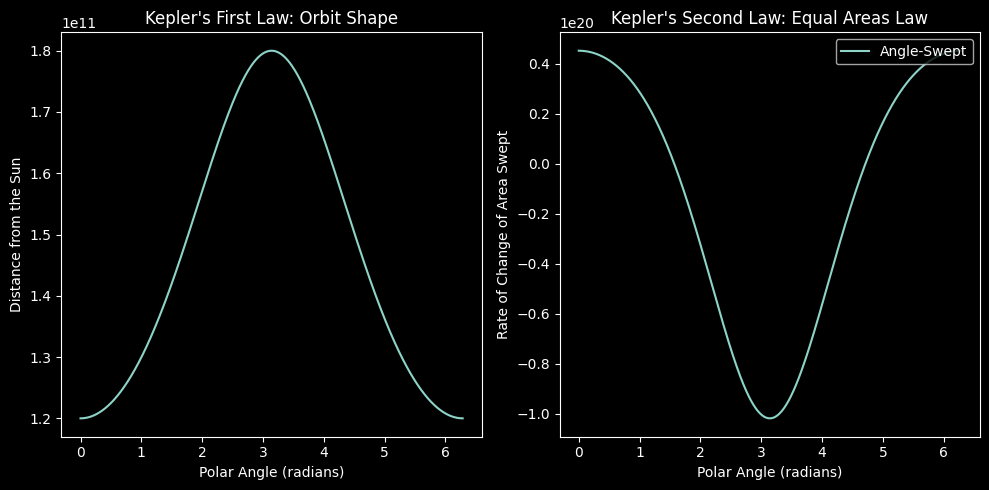

In [12]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(angleValues,distanceValues,label="Angle-Distance")
plt.title("Kepler's First Law: Orbit Shape")
plt.xlabel("Polar Angle (radians)")
plt.ylabel("Distance from the Sun")
plt.subplot(1,2,2)
plt.plot(angleValues,sweptAreas,label="Angle-Swept")
plt.title("Kepler's Second Law: Equal Areas Law")
plt.xlabel("Polar Angle (radians)")
plt.ylabel("Rate of Change of Area Swept")
plt.tight_layout()
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

**To simulate the orbit of Mercury around the Sun and visualize the application of Kepler's laws**

In [13]:
semiMajorMercury = 5.791e10  # Semi-major axis in meters
eccentricityMercury = 0.2056  # Eccentricity

In [14]:
angleValues = np.linspace(0,2*np.pi,1000) # in radians
angleStep = angleValues[0]-angleValues[1]

In [15]:
distanceValuesMercury = KeplerFirstLaw(semiMajorMercury,eccentricityMercury,angleValues)
sweptValuesMercury = [KeplerSecondLaw(semiMajorMercury,eccentricityMercury,angle,angleStep) for angle in angleValues]

In [16]:
orbitalPeriodMercury = KeplerThirdLaw(semiMajorMercury,M_sun.value)

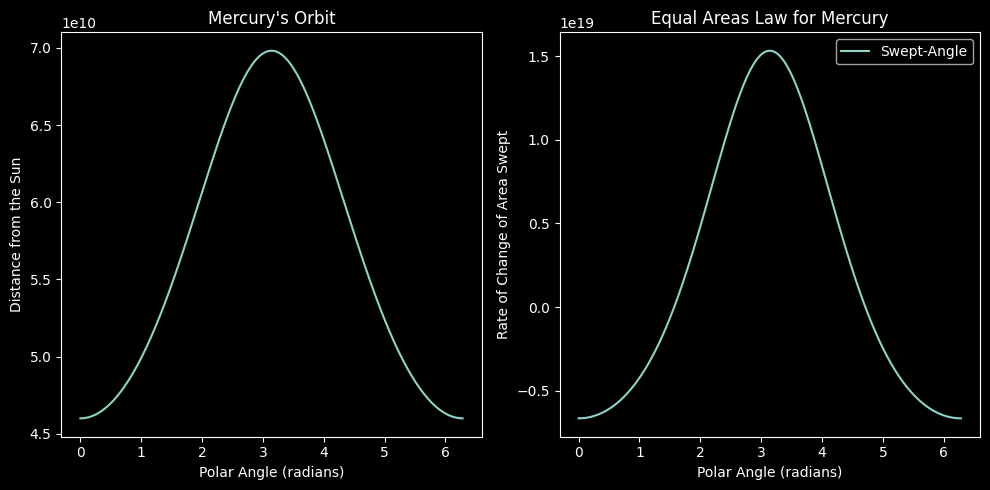

In [17]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(angleValues,distanceValuesMercury,label="Distance-Angle")
plt.title("Mercury's Orbit")
plt.xlabel("Polar Angle (radians)")
plt.ylabel("Distance from the Sun")
plt.subplot(1,2,2)
plt.plot(angleValues,sweptValuesMercury,label="Swept-Angle")
plt.title("Equal Areas Law for Mercury")
plt.xlabel("Polar Angle (radians)")
plt.ylabel("Rate of Change of Area Swept")
plt.legend()
plt.tight_layout()
plt.show()

In [18]:
print(f"Orbital Period (Calculated): {orbitalPeriodMercury:.2f} seconds or {orbitalPeriodMercury/(60*60*24)} days")
print(f"Orbital Period (Known): 7.6e6 seconds (actual) or {7.6e6/(60*60*24)} days (actual)")

Orbital Period (Calculated): 7600714.13 seconds or 87.97122838340087 days
Orbital Period (Known): 7.6e6 seconds (actual) or 87.96296296296296 days (actual)


* In the case of the two-body problem, we are dealing with a system of coupled differential equations for the vector functions $r_1(t)$ and $r_2(t)$. By reformulating the equations of motion as a system of first-order differential equations:

> $v^{'}_1 = \frac{GM_2}{|r_2 - r_1|^3} (r_2 - r_1)$ , and  $r^{'}_1 = v_1$

> $v^{'}_2 = \frac{GM_1}{|r_2 - r_1|^3} (r_1 - r_2)$ , and  $r^{'}_2 = v_2$

In [19]:
a = 2.64*7.4957*au # semi-major axis
e = 0.5914 # eccentricity

In [20]:
M1 = 2.06*M_sun.value # mass of Sirius A
M2 = 1.02*M_sun.value # mass of Sirius B

In [21]:
numberofRevolutions = 3 # number of revolutions
n = numberofRevolutions*500 # number of time steps
dt = numberofRevolutions*orbitalPeriodSirius/n # time step
t = np.arange(0,(n+1)*dt,dt) # time interval

In [22]:
# data arrays for coordinates
x1 = np.zeros(n+1)
y1 = np.zeros(n+1)
x2 = np.zeros(n+1)
y2 = np.zeros(n+1)

In [23]:
# data arrays for velocity components
vx1 = np.zeros(n+1)
vy1 = np.zeros(n+1)
vx2 = np.zeros(n+1)
vy2 = np.zeros(n+1)

In [24]:
# periastron distance
d = a*(1 + e)
# vis-viva equation, relative velocity
v = np.sqrt(G*(M1 + M2)*(2/d - 1/a))
print(f"Periastron Distance: {d}")
print(f"Relative Velocity: {v}")

Periastron Distance: 4711084447129.35
Relative Velocity: 5954.151925261919


In [25]:
x1[0], y1[0] = d*M2/(M1 + M2), 0 # position vectors
x2[0], y2[0] = -d*M1/(M1 + M2), 0 # position vectors

In [26]:
vx1[0], vy1[0] = 0, -v*M2/(M1 + M2) # orbital velocities at the periastron
vx2[0], vy2[0] = 0, v*M1/(M1 + M2) # orbital velocities at the periastron

In [27]:
alphaValue = G*M1*M2

**Forward Euler is a numerical integration method commonly used for solving ordinary differential equations (ODEs) to approximate the solution over time. In the context of orbital mechanics, it can be applied to update the velocity and position of a celestial body based on gravitational interactions. The updates are performed incrementally over small time steps (dt).**

- Velocity Update:
> $v_{t+dt} = v_t + a_t \cdot dt$

- Position Update:
> $r_{t+dt} = r_t + v_t \cdot dt$

These updates are based on the equations of motion ($F=ma$) and the definition of velocity and position in kinematics.

In [28]:
for i in range(n):
  delta_x = x2[i] - x1[i]
  delta_y = y2[i] - y1[i]
  # third power of distance, with the gravitational force
  d3 = (delta_x**2 + delta_y**2)**(3/2)
  # force components
  Fx = alphaValue*delta_x/d3
  Fy = alphaValue*delta_y/d3
  # forward Euler velocity updates
  vx1[i+1] = vx1[i] + Fx*dt/M1
  vy1[i+1] = vy1[i] + Fy*dt/M1
  vx2[i+1] = vx2[i] - Fx*dt/M2
  vy2[i+1] = vy2[i] - Fy*dt/M2
  # forward Euler position updates
  x1[i+1] = x1[i] + vx1[i]*dt
  y1[i+1] = y1[i] + vy1[i]*dt
  x2[i+1] = x2[i] + vx2[i]*dt
  y2[i+1] = y2[i] + vy2[i]*dt

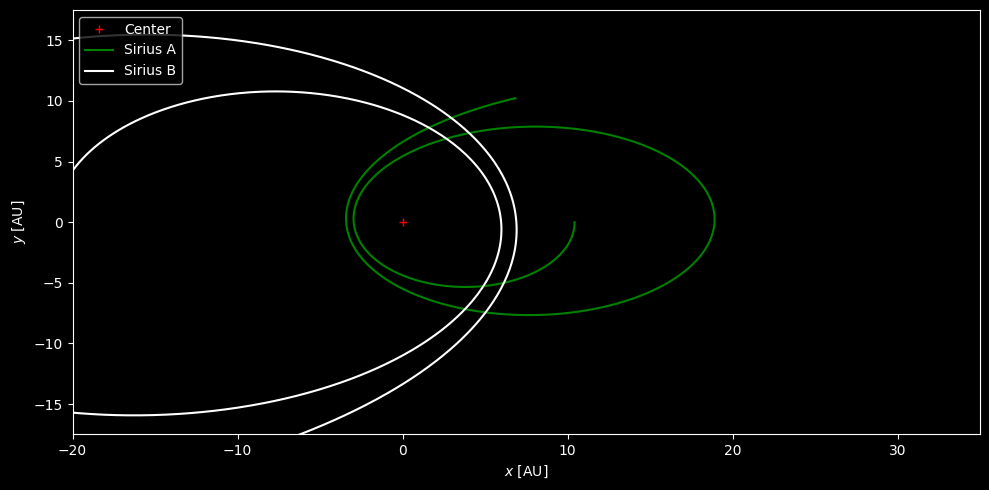

In [29]:
figure = plt.figure(figsize=(10,5))
plt.plot([0],[0],"+r",label="Center") # center of mass
plt.plot(x1/au,y1/au,color="green",label="Sirius A")
plt.plot(x2/au,y2/au,color="white",label="Sirius B")
plt.xlabel("$x$ [AU]")
plt.xlim(-20,35)
plt.ylabel("$y$ [AU]")
plt.ylim(-17.5,17.5)
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

In [30]:
initialState = np.array(
    [x1[0],y1[0],x2[0],y2[0],vx1[0],vy1[0],vx2[0],vy2[0]]
)

In [31]:
initialState

array([ 1.56016433e+12,  0.00000000e+00, -3.15092012e+12,  0.00000000e+00,
        0.00000000e+00, -1.97182953e+03,  0.00000000e+00,  3.98232239e+03])

In [32]:
def StateDerivative(time:int,state:list)->list:
  alpha = G*M1*M2
  deltaX = state[2]-state[0] # x2 - x1
  deltaY = state[3]-state[1] # y2 - y1
  distance = (deltaX**2+deltaY**2)**(3/2) # third power of distance
  fx = alpha*deltaX/distance # force component (x)
  fy = alpha*deltaY/distance # force component (y)
  der = np.array(
      [state[4],state[5],state[6],state[7],fx/M1,fy/M1,-fx/M2,-fy/M2]
  )
  return der

In [33]:
solution = solve_ivp(
    StateDerivative,
    (0,3*orbitalPeriodSirius),
    initialState,
    dense_output=True
)

In [34]:
data = solution.sol(t)

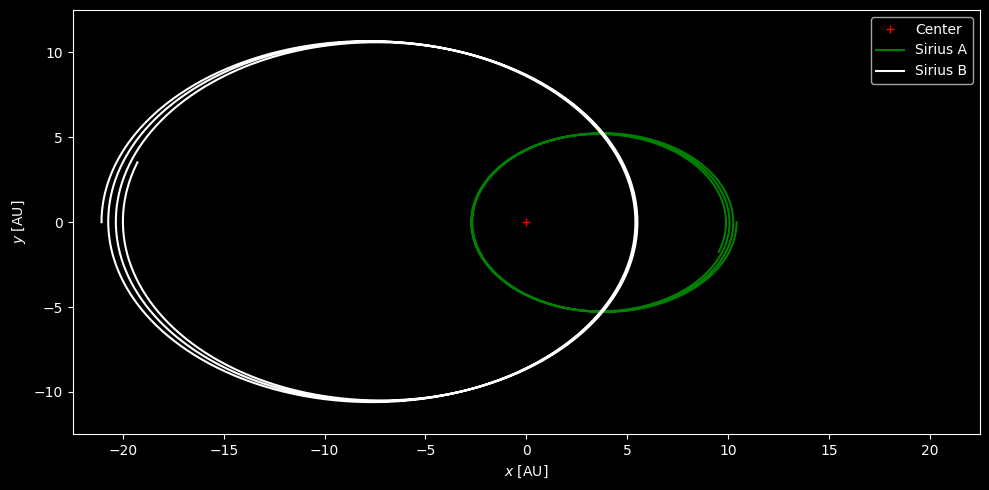

In [35]:
figure = plt.figure(figsize=(10,5))
plt.plot([0],[0],"+r",label="Center")
plt.plot(data[0,:]/au,data[1,:]/au,color="green",label="Sirius A")
plt.plot(data[2,:]/au,data[3,:]/au,color="white",label="Sirius B")
plt.xlabel("$x$ [AU]")
plt.xlim(-22.5,22.5)
plt.ylabel("$y$ [AU]")
plt.ylim(-12.5,12.5)
plt.legend()
plt.tight_layout()
plt.show()

**Such a configuration is found in the triple star system Beta Persei, which is also known as Algol. Algol Aa1 and Aa2 constitute an eclipsing binary with a period of less than three days. This binary and a third star, designated Ab, revolve around each other over a period of 680 days.**

In [56]:
M1 = 3.17*M_sun.value # mass of Algol Aa1
M2 = 0.70*M_sun.value # mass of Algol Aa2
M3 = 1.76*M_sun.value # mass of Algol Ab

In [59]:
# inner orbit (Aa1 and Aa2)
T12 = 2.867*day
e12 = 0

In [60]:
# outer orbit (Aa and Ab)
T = 680.2*day
e = 0.227

In [61]:
a12 = (T12/(2*np.pi))**(2/3) * (G*(M1 + M2))**(1/3)
a = (T/(2*np.pi))**(2/3) * (G*(M1 + M2 + M3))**(1/3)
print(f"Inner Semi-Major Axis: {a12/au} AU")
print(f"Outer Semi-Major Axis: {a/au} AU")

Inner Semi-Major Axis: 0.06200925291438539 AU
Outer Semi-Major Axis: 2.692743164152495 AU


In [62]:
M12 = M1 + M2
d12 = a12*(1 - e12) # periastron distance
v12 = np.sqrt(G*M12*(2/d12 - 1/a12))

In [63]:
x1, y1 = d12*M2/M12, 0
x2, y2 = -d12*M1/M12, 0

In [64]:
vx1, vy1 = 0, -v12*M2/M12
vx2, vy2 = 0, v12*M1/M12

**think of Aa1 and Aa2 as a single object of total mass $M_1 + M_2$:**

In [65]:
d = a*(1 - e) # periastron distance
v = np.sqrt(G*(M12 + M3)*(2/d - 1/a)) # velocity

In [66]:
x1 += d*M3/(M12 + M3)
x2 += d*M3/(M12 + M3)
x3, y3 = -d*M12/(M12 + M3), 0

In [67]:
vy1 -= v*M3/(M12 + M3)
vy2 -= v*M3/(M12 + M3)
vx3, vy3 = 0, v*M12/(M12 + M3)

In [68]:
initialStates = [x1,y1,x2,y2,x3,y3,vx1,vy1,vx2,vy2,vx3,vy3]

In [69]:
def StateDerivativeSystem(time:int,state:list)->list:
  alpha = G*M1*M2
  beta = G*M1*M3
  gamma = G*M2*M3
  delta12X = state[2]-state[0] # x2 - x1
  delta12Y = state[3]-state[1] # y2 - y1
  delta13X = state[4]-state[0] # x3 - x1
  delta13Y = state[5]-state[1] # y3 - y1
  delta23X = state[4]-state[2] # x3 - x2
  delta23Y = state[5]-state[3] # y3 - y2
  # force components
  f12X = alpha*delta12X/(delta12X**2 + delta12Y**2)**(3/2)
  f12Y = alpha*delta12Y/(delta12X**2 + delta12Y**2)**(3/2)
  f13X = beta*delta13X/(delta13X**2 + delta13Y**2)**(3/2)
  f13Y = beta*delta13Y/(delta13X**2 + delta13Y**2)**(3/2)
  f23X = gamma*delta23X/(delta23X**2 + delta23Y**2)**(3/2)
  f23Y = gamma*delta23Y/(delta23X**2 + delta23Y**2)**(3/2)
  # solution
  solution = np.array(
      [
          state[6],state[7],state[8],state[9],state[10],state[11],
          (f12X+f13X)/M1,
          (f12Y+f13Y)/M1,
          (-f12X+f23X)/M2,
          (-f12Y+f23Y)/M2,
          (-f13X-f23X)/M3,
          (-f13Y-f23Y)/M3
          ]
  )
  return solution

In [70]:
solution = solve_ivp(StateDerivativeSystem,(0,0.5*T),initialStates,dense_output=True,rtol=1e-6)

In [71]:
data = solution.y
print(f"Data Type: {type(data)}")
print(f"Data Shape: {data.shape}")

Data Type: <class 'numpy.ndarray'>
Data Shape: (12, 2463)


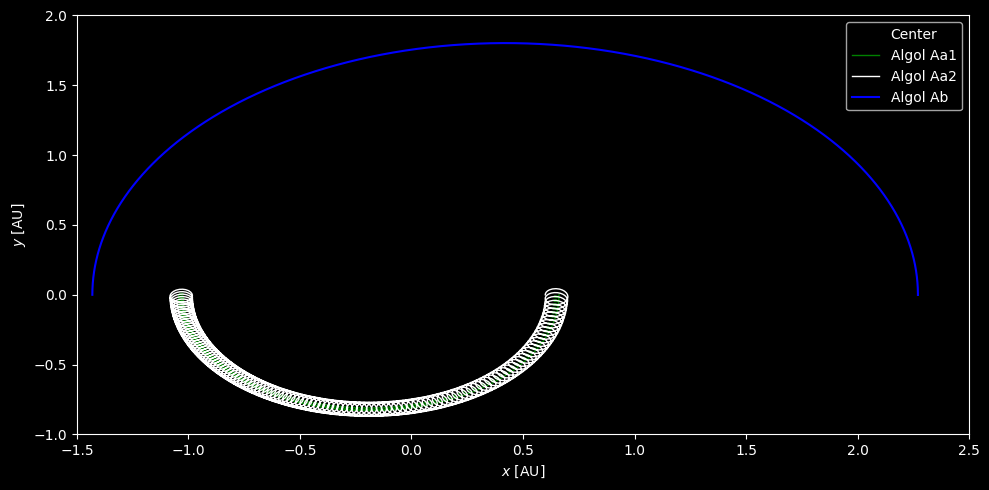

In [72]:
figure = plt.figure(figsize=(10,5))
plt.plot([0],[0],"+k",label="Center")
plt.plot(data[0,:]/au,data[1,:]/au,color="green",lw=1,label="Algol Aa1")
plt.plot(data[2,:]/au,data[3,:]/au,color="white",lw=1,label="Algol Aa2")
plt.plot(data[4,:]/au,data[5,:]/au,color="blue",label="Algol Ab")
plt.xlabel("$x$ [AU]")
plt.ylabel("$y$ [AU]")
plt.xlim(-1.5,2.5)
plt.ylim(-1,2)
plt.legend()
plt.tight_layout()
plt.show()

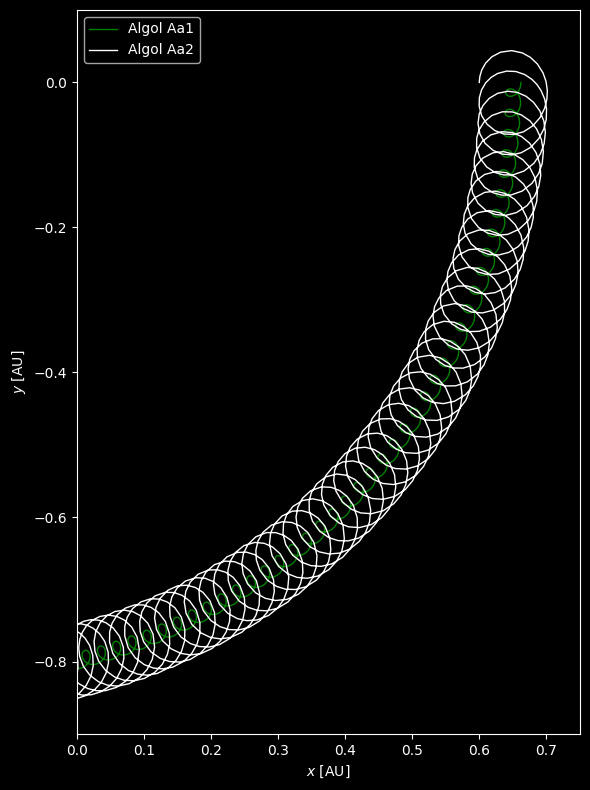

In [77]:
fiureg = plt.figure(figsize=(6,6*1/0.75), dpi=100)
plt.plot(data[0,:]/au, data[1,:]/au, color='green', lw=1, label='Algol Aa1')
plt.plot(data[2,:]/au, data[3,:]/au, color='white', lw=1, label='Algol Aa2')
plt.xlabel("$x$ [AU]")
plt.xlim(0,0.75)
plt.ylabel("$y$ [AU]")
plt.ylim(-0.9,0.1)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()